# **PROBLEM STATEMENT**





## To predict the temperature using Algerian Forest Fire Dataset
## Dataset: https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#
## **Attribute information**
1. **date**: (DD/MM/YYYY)Day,Month(june to september), year(2012)Weather data observation
2. **Temp**: temperature noon (temperature max) in Celcius degree: 22 to 42
3.**RH**: Relative humidity in %: 21 to 90
4.**Ws**: Wind speed in km/h: 6 to 29
5.**Rain**: Total day in mm: 0 to 16.8 FWI Components
6.**Fine Fuel Moisture Code(FFMC)**: index from FWI system: 28.6 to 92.5
7.**Duff Moisture Code(DMC)**: index from FWI system: 1.1 to 65.9
8.**Drought Code(DC)**: index from FWI system: 7 to 220.4
9.**Initial Spread Index(ISI)**: index from FWI system: 0 to 18.5
10.**Builtup Index(BUI)**: index from FWI system: 1.1 to 68
11.**Fire Weather Index**: Index: 0 to 31.1
12.**Classes**: two classes, namely 'fire' and 'not fire'

# **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



 # **Data Collection**

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Portfolio/P2/Algerian_forest_fires_dataset_UPDATE.csv', header = 1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


# **Analysing Data**
## Checking for null values

In [3]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


- Since we see that the 'day' column contains string, we'll check every row using for loop and check if there are any more of the strings. 

In [4]:
# using FOR loop to traverse through every row in 'day' column
# print(df['day'][122])
# print(df['day'][123])

# for i in df['day']:
#   print(i)

df['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31',
       'Sidi-Bel Abbes Region Dataset', 'day'], dtype=object)

In [5]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
df.drop([122,123,167], axis=0, inplace = True)
df=df.reset_index()
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


Columns

In [7]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

- In column names we see unwanted spacing
- So lets get rid of the white spaces.




**Columns with extra spaces**


In [8]:
[x for x in df.columns if ' ' in x]

#Here we see that there are 4 columns which contain whitespaces

[' RH', ' Ws', 'Rain ', 'Classes  ']

**Removing the white spaces in column name**

In [9]:
df.columns= df.columns.str.strip()
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

**Function to remove extra space from the data**

In [10]:
import re
def RemoveExtraSpace(s):
  return s.replace(" ","")

In [11]:
df['Classes'] = df['Classes'].apply(RemoveExtraSpace)

In [12]:
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,notfire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,notfire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,notfire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,notfire


**droping the 'index' that we had created while reset_index**

In [13]:
df.drop(['index'], axis=1, inplace = True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,notfire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,notfire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,notfire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,notfire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,notfire
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,notfire
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,notfire


**Create one region, just to identify two region i.e., Sidi-Bel Abbes Region and Bejaia Region**

In [14]:
df.loc[:122, 'Region'] = 0
df.loc[122:, 'Region'] = 1

In [15]:
df.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,notfire,0.0
26,27,06,2012,34,53,18,0,89,21.6,80.3,9.2,25.8,15,fire,0.0
139,18,06,2012,33,62,10,8.7,65.5,4.6,8.3,0.9,4.4,0.4,notfire,1.0
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,notfire,1.0
190,09,08,2012,39,43,12,0,91.7,16.5,30.9,9.6,16.4,12.7,fire,1.0
164,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire,1.0
94,03,09,2012,25,78,15,3.8,42.6,1.2,7.5,0.1,1.7,0,notfire,0.0
68,08,08,2012,32,60,18,0.3,77.1,11.3,47,2.2,14.1,2.6,notfire,0.0
132,11,06,2012,31,42,21,0,90.6,18.2,30.5,13.4,18,16.7,fire,1.0
159,08,07,2012,35,47,18,6,80.8,9.8,9.7,3.1,9.4,3,fire,1.0


**Check for null values**

In [16]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

**Map "Classes" feature as 1 and 0 for fire and notfire respectively** 

In [17]:
df['Classes']=df['Classes'].map({'notfire' : 0, 'fire' : 1})

In [18]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0.0


**Check for duplicate value in all the column**

In [19]:
df.duplicated().sum()   

0

**Check for DataTypes**

In [22]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes          int64
Region         float64
dtype: object

In [24]:
# Convert features to its logical datatypes
convert_features = {'Temperature':'int64', 
                    'RH':'int64', 
                    'Ws' : 'int64',
                    'Rain' : 'float64',
                    'FFMC' : 'float64',
                    'DMC' : 'float64',
                    'DC' : 'float64',
                    'ISI' : 'float64',
                    'BUI' : 'float64',
                    'FWI' : 'float64',
                    'Classes' : 'object',
                    'Region' : 'object'}
df=df.astype(convert_features)

In [26]:
# Converted data types
df.dtypes

day             object
month           object
year            object
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

In [27]:
df.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes          2
Region           2
dtype: int64

In [29]:
# Statistics of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0
BUI,243.0,16.690535,14.228421,1.1,6.00,12.4,22.65,68.0
FWI,243.0,7.035391,7.440568,0.0,0.70,4.2,11.45,31.1


**Segregate categorical features from the dataset**

In [33]:
categorical_features = [features for features in df.columns if df[features].dtypes == 'object']
categorical_features

['day', 'month', 'year', 'Classes', 'Region']

**Checking value counts of the Classes and Regions**

In [38]:
features=['Classes', 'Region']
for x in features:
  print(df.groupby(x)[x].value_counts())

Classes  Classes
0        0          106
1        1          137
Name: Classes, dtype: int64
Region  Region
0.0     0.0       122
1.0     1.0       121
Name: Region, dtype: int64


**Segregate numerical features from the dataset**

In [40]:
numerical_features = [features for features in df.columns if df[features].dtypes != 'O']
numerical_features

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

**Segregate discrete features from the numerical feature**

In [41]:
discrete_features = [x for x in numerical_features if df[x].dtypes == 'int64']
discrete_features

['Temperature', 'RH', 'Ws']

**Segregate Continuous features from the numerical feature**

In [42]:
continuous_features = [x for x in numerical_features if df[x].dtypes == 'float64']
continuous_features

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# **GRAPHICAL ANALYSIS**

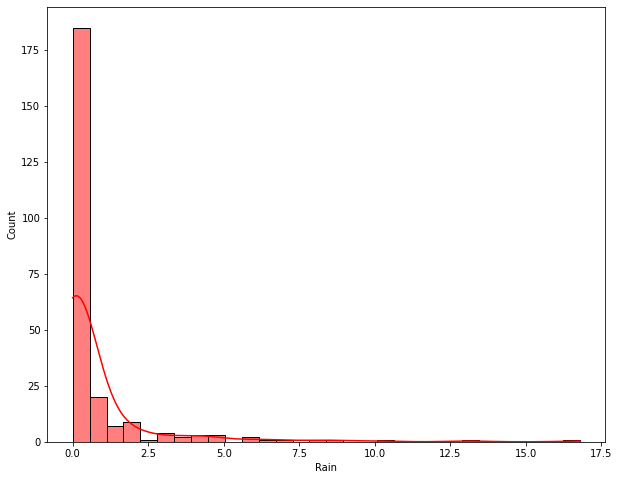

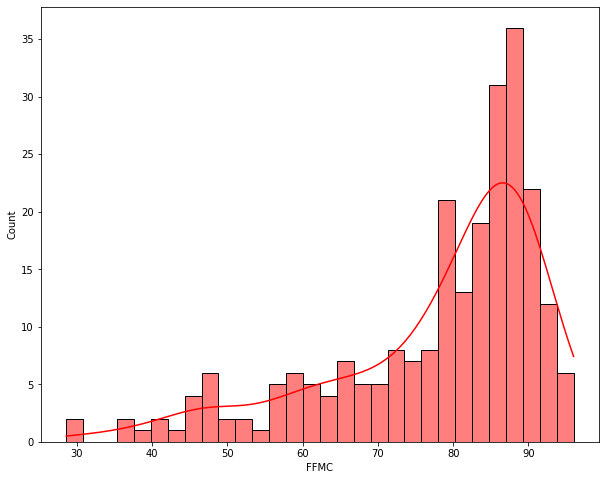

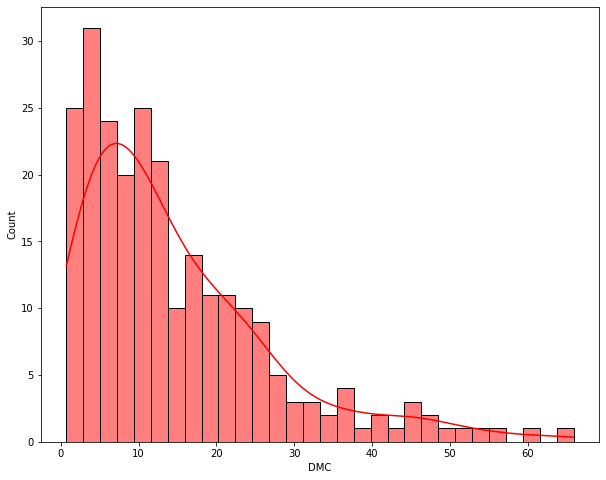

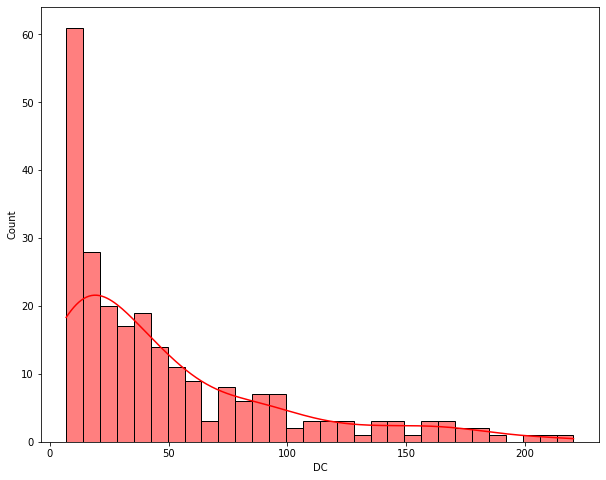

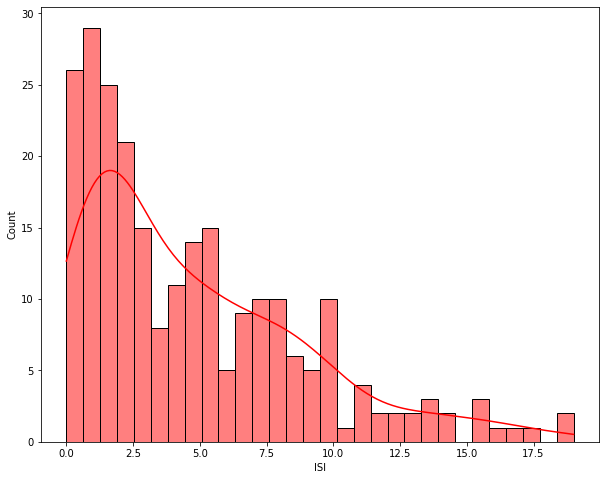

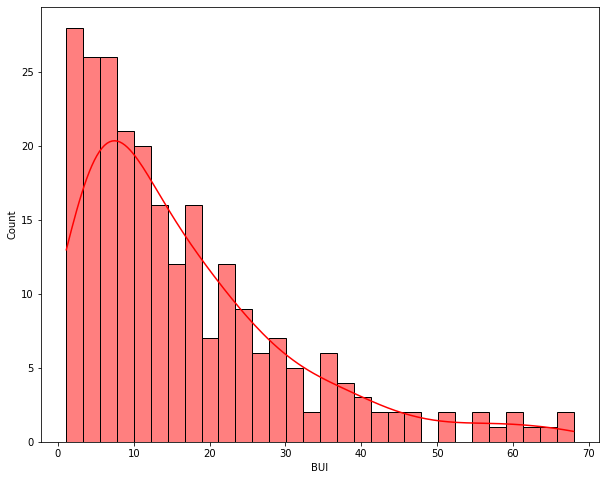

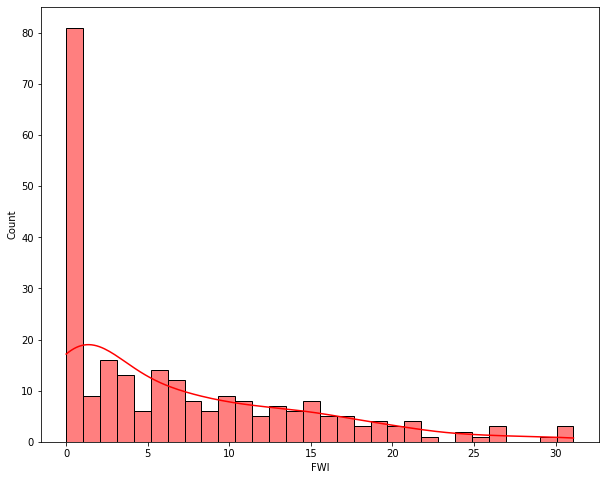

In [51]:
for features in continuous_features:
  plt.figure(figsize=(10,8))
  sns.histplot(data=df, x=features, kde=True, bins=30, color='red')
  plt.show()

# **Outliers Handling**

## Before outliers

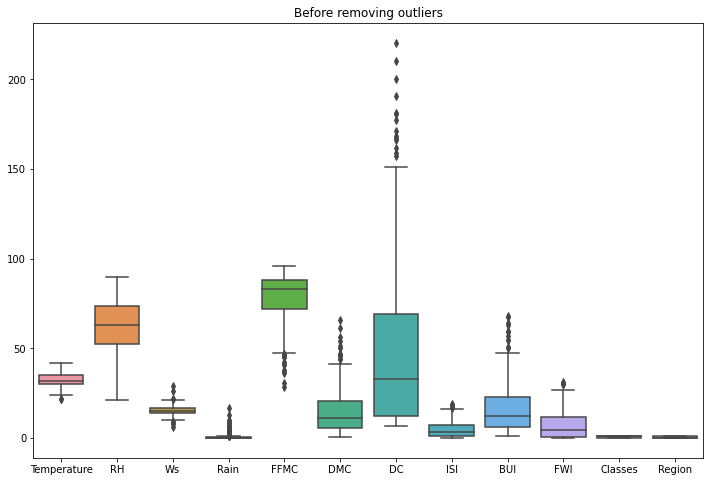

In [59]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.title('Before removing outliers')
plt.show()

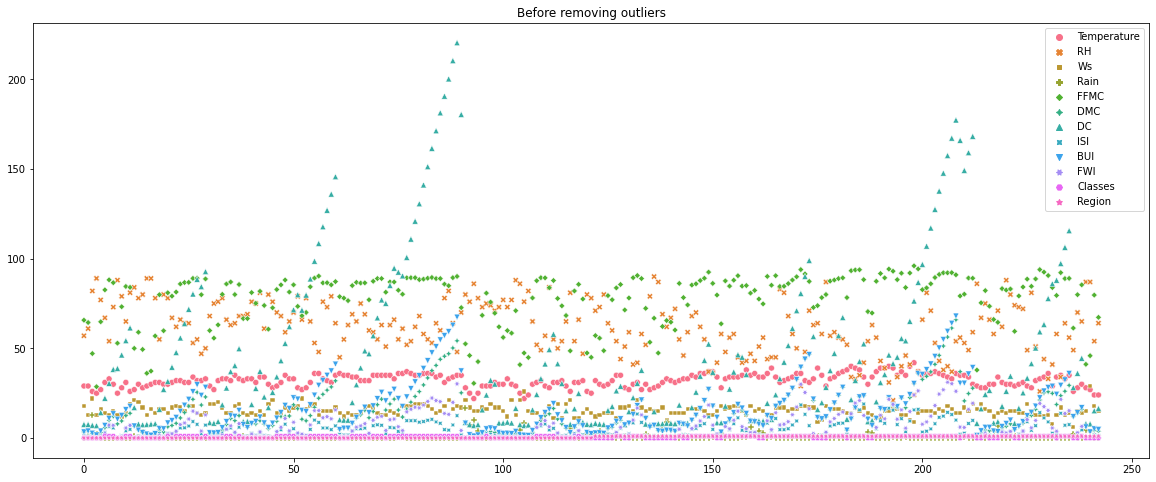

In [63]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df)
plt.title('Before removing outliers')
plt.show()